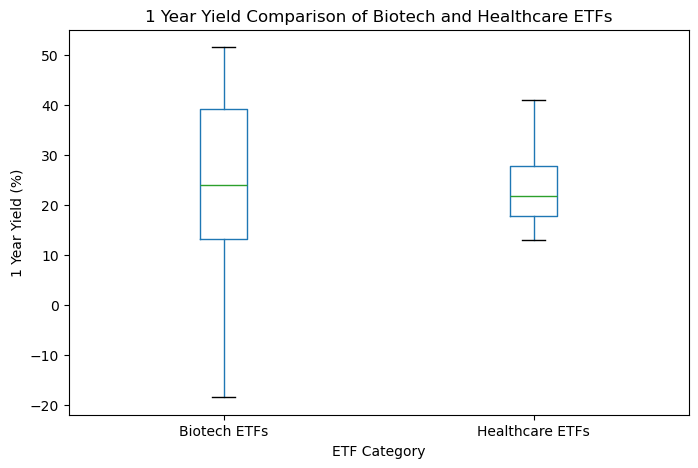

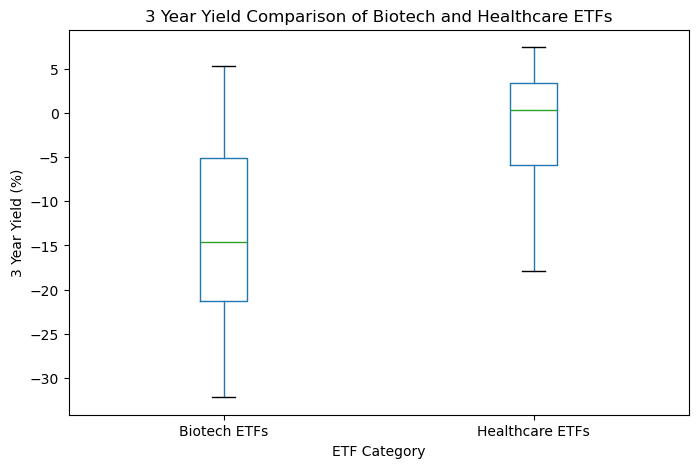

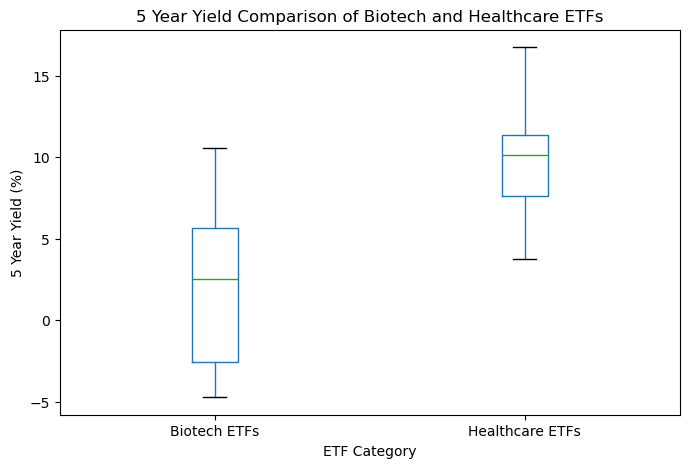

Average Yields for Biotech ETFs:
1 Year    26.955882
3 Year   -16.792500
5 Year     0.029286
dtype: float64

Average Yields for Healthcare ETFs:
1 Year    23.460400
3 Year    -3.413000
5 Year     7.441429
dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

biotech_etfs = pd.read_csv('biotechnology_etf.csv')
healthcare_etfs = pd.read_csv('broadhealthcare_etf.csv')

# Filter out rows cuz inverse sucks
biotech_etfs = biotech_etfs[biotech_etfs['Inverse'] == 'No']
healthcare_etfs = healthcare_etfs[healthcare_etfs['Inverse'] == 'No']

biotech_etfs.replace('N/A', np.nan, inplace=True)
healthcare_etfs.replace('N/A', np.nan, inplace=True)

columns_to_average = ['1 Year', '3 Year', '5 Year']

for col in columns_to_average:
    biotech_etfs[col] = biotech_etfs[col].replace({r'[^\d.-]': ''}, regex=True)
    healthcare_etfs[col] = healthcare_etfs[col].replace({r'[^\d.-]': ''}, regex=True)

biotech_etfs[columns_to_average] = biotech_etfs[columns_to_average].apply(pd.to_numeric, errors='coerce')
healthcare_etfs[columns_to_average] = healthcare_etfs[columns_to_average].apply(pd.to_numeric, errors='coerce')

for year in columns_to_average:
    plt.figure(figsize=(8, 5))
    plt.title(f"{year} Yield Comparison of Biotech and Healthcare ETFs")
    plt.xlabel("ETF Category")
    plt.ylabel(f"{year} Yield (%)")
    
    year_data = pd.DataFrame({
        "Biotech ETFs": biotech_etfs[year].dropna(),
        "Healthcare ETFs": healthcare_etfs[year].dropna()
    })
    
    year_data.boxplot(grid=False, showfliers=False)
    plt.show()
biotech_avg_yields = biotech_etfs[columns_to_average].mean()

healthcare_avg_yields = healthcare_etfs[columns_to_average].mean()

print("Average Yields for Biotech ETFs:")
print(biotech_avg_yields)
print("\nAverage Yields for Healthcare ETFs:")
print(healthcare_avg_yields)
